In [1]:
!pip install wfdb

     |████████████████████████████████| 143kB 14.6MB/s 


In [2]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt

#grab data from https://www.physionet.org/physiobank/database/apnea-ecg/
record = wfdb.rdrecord('x35', pn_dir='apnea-ecg/')
data = pd.DataFrame(record.p_signal).squeeze()

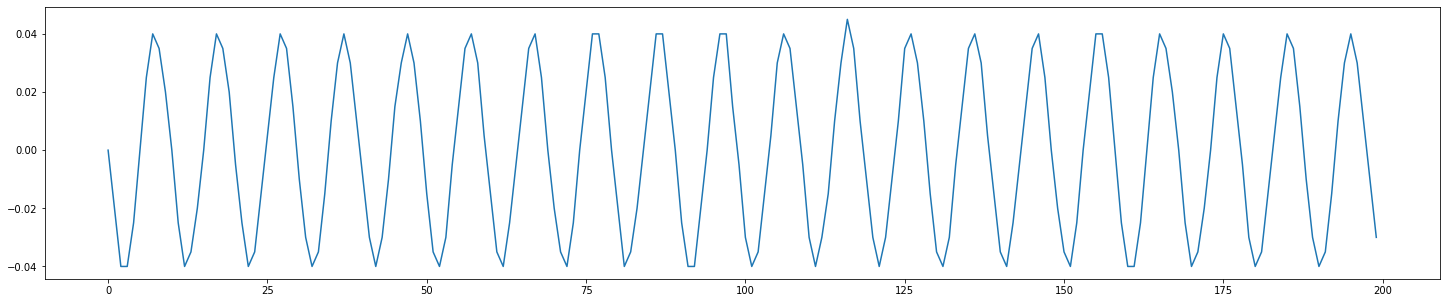

In [3]:
# Plot the 100 data points (1s) of this ECG Signal
plt.figure(figsize=(25,5))
plt.plot(data[:200])
plt.show()

In [4]:
# Signal Preprocessing : decomposing the signal to n-long (time_steps) batches
time_steps = 100
X=[]
for i in range(data.size // time_steps):
  X.append(data[i*time_steps:(i+1)*time_steps])

In [ ]:
import numpy as np
from sklearn.datasets import make_sparse_coded_signal
from sklearn.decomposition import DictionaryLearning

# Initilize the DictionaryLearning object
dict_learner = DictionaryLearning(
    n_components=1000, transform_algorithm='omp', random_state=42,
)

# Defining train and test size
test_size = 10
train_size = len(X) - test_size
X_train , X_test = X[:train_size] , X[train_size:len(X)]

# Fitting to the data
X_transformed = dict_learner.fit_transform(X_train)

In [ ]:
# Predicting on the training set
X_hat = X_transformed @ dict_learner.components_

# calculate the Mean Absolute Error (MAE) on the training set
print(np.mean(np.sum(np.absolute((X_hat - X_train)), axis=1) / np.sum(np.absolute(X_train), axis=1)))

In [ ]:
# Plotting the first 400 original and predicted data points in the train test 
plt.figure(figsize=(25,5))
plt.plot(np.array(X_train[:4]).reshape(400),color="blue")
plt.plot(X_hat[:4].reshape(400), color="red")
plt.show()

In [ ]:
# Predicting on the test set
X_hat_test = dict_learner.transform(X_test) @ dict_learner.components_
# calculate the Mean Absolute Error (MAE) on the test set
np.mean(np.sum(np.absolute((X_hat_test - X_test)), axis=1) / np.sum(np.absolute(X_test), axis=1))

In [ ]:
# Plotting the original and predicted data points in the test set
plt.figure(figsize=(25,5))
plt.plot(np.array(X_test).reshape((test_size)*time_steps),color="blue")
plt.plot(X_hat_test.reshape((test_size)*time_steps), color="red")
plt.show()